In [59]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import helpers
from scipy import stats
import numpy as np

pd.options.mode.copy_on_write = True

In [ ]:
curr_dir = Path("/home/srs-9/Projects/ms_mri/analysis/paper1")
data_dir = curr_dir / "data"

analysis_dir = Path("/home/srs-9/Projects/ms_mri/monai_analysis")
df_t1 = pd.read_csv(
    analysis_dir / "choroid_pineal_pituitary_T1-1" / "clinical_data_full.csv",
    index_col="subid",
)
df_flair = pd.read_csv(
    analysis_dir / "choroid_pineal_pituitary_FLAIR-1" / "clinical_data_full.csv",
    index_col="subid",
)
df_t1_flair = pd.read_csv(
    analysis_dir / "choroid_pineal_pituitary3" / "clinical_data_full.csv",
    index_col="subid",
)

In [21]:
df = df_t1[["ms_type", "flair_contrast"]]
df = helpers.set_dz_type2(df)
df = helpers.set_dz_type5(df)

df.loc[:, ["cp_t1_vol"]] = df_t1["choroid_volume"]
df.loc[:, ["cp_flair_vol"]] = df_flair["choroid_volume"]
df.loc[:, ["cp_t1.flair_vol"]] = df_t1_flair["choroid_volume"]

df.loc[:, ["pin_t1_vol"]] = df_t1["pineal_volume"]
df.loc[:, ["pin_flair_vol"]] = df_flair["pineal_volume"]
df.loc[:, ["pin_t1.flair_vol"]] = df_t1_flair["pineal_volume"]

df.loc[:, ["pit_t1_vol"]] = df_t1["pituitary_volume"]
df.loc[:, ["pit_flair_vol"]] = df_flair["pituitary_volume"]
df.loc[:, ["pit_t1.flair_vol"]] = df_t1_flair["pituitary_volume"]

df.to_csv(data_dir / "inference_volumes.csv")
cp_diff = df["cp_t1_vol"] - df["cp_flair_vol"]

In [ ]:
def w_contrast(df):
    return df["flair_contrast"] == "WITH"


def wo_contrast(df):
    return df["flair_contrast"] == "WITHOUT"

In [74]:
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(
        ((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof
    )


## Choroid Volumes

### Compare Flair Contrast Conditions

Text(0.5, 1.0, 'With Contrast')

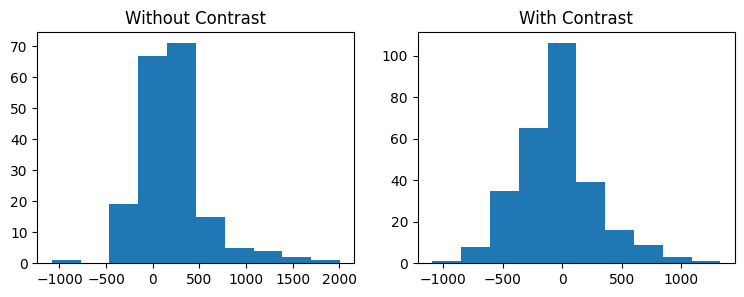

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))
ax = axes[0]
ax.hist(cp_diff[wo_contrast(df)])
ax.set_title("Without Contrast")
ax = axes[1]
ax.hist((cp_diff[w_contrast(df)]))
ax.set_title("With Contrast")

Check normality with Shapiro-Wilks test

In [72]:
stat, p = stats.shapiro(cp_diff[wo_contrast(df)], nan_policy="omit")
print("wo contrast, p={:0.3}".format(p))

stat, p = stats.shapiro(cp_diff[w_contrast(df)], nan_policy="omit")
print("w contrast, p={:0.3}".format(p))

wo contrast, p=4.02e-10
w contrast, p=2.25e-05


Compare variances of w and wo contrast groups

In [ ]:
stat, p = stats.levene(
    cp_diff[w_contrast(df)], cp_diff[wo_contrast(df)], nan_policy="omit"
)
print("p={:0.3}".format(p))

p=0.669


Plot the differences in choroid volume for each group

Text(0.5, 1.0, 'Choroid Volume, T1 - FLAIR')

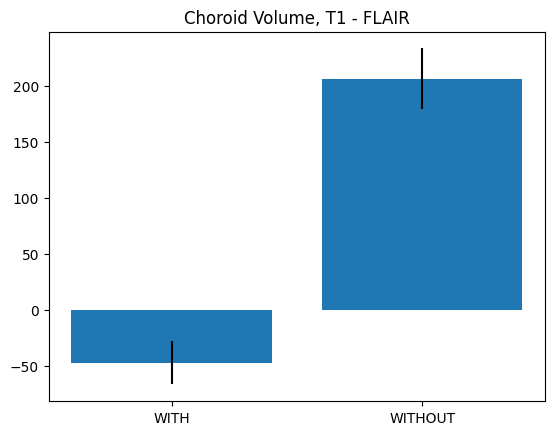

In [42]:
plt.bar(
    ["WITH", "WITHOUT"],
    [
        cp_diff[w_contrast(df)].mean(),
        cp_diff[wo_contrast(df)].mean(),
    ],
    yerr=[
        cp_diff[w_contrast(df)].sem(),
        cp_diff[wo_contrast(df)].sem(),
    ],
)

plt.title("Choroid Volume, T1 - FLAIR")

Without contrast, the choroid appears larger in the T1 model (d=0.33, p=1.3e-12), and with contrast the choroid appears smaller in the T1 model (-0.090, p=0.017).

In [78]:
t, p = stats.ttest_1samp(cp_diff[wo_contrast(df)], 0, nan_policy="omit")
d = cohen_d(df[wo_contrast(df)]['cp_t1_vol'], df[wo_contrast(df)]['cp_flair_vol'])
print("wo contrast, p={:0.3}, d={:0.3}".format(p, d))

t, p = stats.ttest_1samp(cp_diff[w_contrast(df)], 0, nan_policy="omit")
d = cohen_d(df[w_contrast(df)]['cp_t1_vol'], df[w_contrast(df)]['cp_flair_vol'])
print("w contrast,  p={:0.3}, d={:0.3}".format(p, d))

wo contrast, p=1.6e-12, d=0.326
w contrast,  p=0.0169, d=-0.0889
